In [1]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
     ---------------------------------------- 0.0/84.4 kB ? eta -:--:--
     -------------- ------------------------- 30.7/84.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------- ----- 71.7/84.4 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 84.4/84.4 kB 951.4 kB/s eta 0:00:00
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.3 kB 1.4 MB/s eta 0:00:01
     ------------------- ------------------- 81.9/162.3 kB 1.6 MB/s eta 0:00:01
     --------------------------------- ---- 143.4/162.3 kB 1.2 MB/s eta 0:00:01
     ---------------------------------

In [7]:
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

torch.backends.cudnn.benchmark = True

In [2]:
# Test to ensure that my cuda is still visible
import torch as torch
torch.cuda.is_available()

True

In [3]:
torch.cuda.set_device(0)
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1080 Ti'

In [8]:
path = untar_data(URLs.CIFAR)
path

Path('C:/Users/ron-w/.fastai/data/cifar10')

In [9]:
bs = 256

In [15]:
ds_tfms = ([OldRandomCrop(4, 32), FlipItem(p=0.5)], [])
data = ImageDataLoaders.from_folder(path, valid='test', item_tfms=ds_tfms, bs=bs)

In [27]:
learn = Learner(data, xresnet152(pretrained=True), metrics=accuracy)

**Fit One Cycle**
Good info on fit_one_cycle: https://iconof.com/1cycle-learning-rate-policy/
https://sgugger.github.io/the-1cycle-policy.html
https://fastai.github.io/fastbook2e/accel_sgd.html

Changed the model to xresnet152, and using pretrained=True, 15 epochs, adding momentum

SuggestedLRs(valley=0.0005754399462603033)

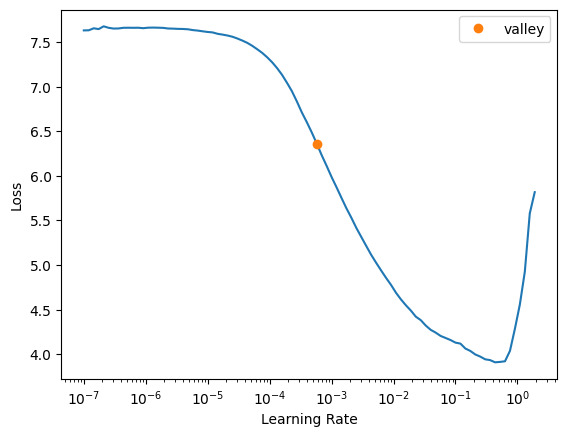

In [28]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(15, 0.000575439, wd=0.4, div=10, pct_start=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,1.353481,1.153646,0.601100,01:39
1,0.891935,0.902271,0.681300,01:38
2,0.683680,0.808143,0.718000,01:39
3,0.513223,0.864587,0.718900,01:41
4,0.379441,0.839439,0.739300,01:39
5,0.311203,1.017114,0.723600,01:39
6,0.271874,0.985147,0.742200,01:38
7,0.225110,1.349582,0.687300,01:38
8,0.174015,0.935169,0.758400,01:38
9,0.103014,1.148061,0.738500,01:38
